# Logistic Regression
***

### Table of Content
1. Predict with Linear Regression
2. Predict with Logsitic Regression
3. Examine and Compare Predictions (Hard Predictions versus Soft Predictions)
4. Model Evaluation
5. Explain how to interpret logistic regression coefficients
6. Homework Exercise and Questions

Let's do it! We'll learn about logistic regression by examining a glass dataset.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Get the glass dataset**

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names)
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Look at class labels**

In [3]:
df.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

**Convert the target feature into a binary feature (glass vs household)**

In [4]:
# glass_type 1, 2, 3 are window glass
# glass_type 5, 6, 7 are household glass
df['household'] = df.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


**Let's plot Aluminum (al) vs household**

Text(0,0.5,'household')

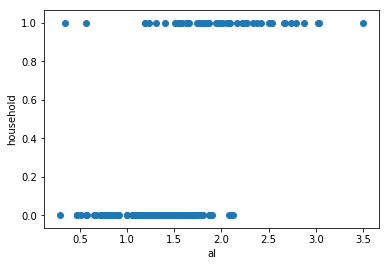

In [5]:
plt.scatter(df.al, df.household)
plt.xlabel('al')
plt.ylabel('household')

**Create Train/Test Split**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['al']],df.household,train_size=0.7)

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Part 1: Predicting with Linear Regression
***

**Create and Train Linear Regression Model**

In [7]:
from sklearn.linear_model import LinearRegression

# Fit the model
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

**Predict with Linear Regression Model**

In [8]:
# Create a seperate table to store predictions
glass_df = X_train[['al']]
glass_df['household_actual'] = y_train

# Predict with Linear Regression
glass_df['household_pred_linear'] = linear_model.predict(X_train)

**Plot Linear Regression**

What is the problem here?
- Linear regression is making predictions outside the range of 0 and 1

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


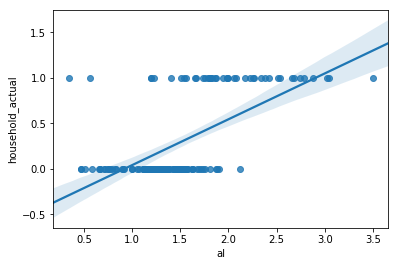

In [9]:
# Plot Linear Regression Line
sns.regplot(x='al', y='household_actual', data=glass_df, logistic=False)

## Part 2: Predicting with Logistic Regression

**Create and Train Logistic Regression Model**

In [10]:
from sklearn.linear_model import LogisticRegression

# Fit the model
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)

**Predict Class Probabilities & Class Predictions**

Logistic Regression allows you to make two types of predictions:
    1. Hard Predictions - Using the predict() will output the **class predictions**
    2. Soft Predictions - Using the predict_proba() will output the **class probabilities**

In [11]:
# Predict with Logistic Regression
glass_df['household_pred_log'] = logistic_model.predict(X_train)

# Predict Probability with Logistic Regression
glass_df['household_pred_prob_log'] = logistic_model.predict_proba(X_train)[:,1]

**Class Probabilities**
- First column is the predicted probability of **class 0**
- Second column is the predicted probability of **class 1**

In [12]:
# examine some example predictions
print (logistic_model.predict_proba(1))
print (logistic_model.predict_proba(2))
print (logistic_model.predict_proba(3))

[[0.85654191 0.14345809]]
[[0.49553672 0.50446328]]
[[0.13912608 0.86087392]]


**Plot Logistic Regression**

This is a lot better. Logistic Regression outcomes are within the range of 0 and 1.

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


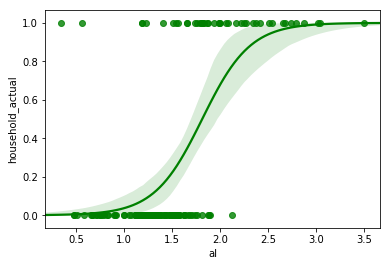

In [13]:
# Plot logistic regression line 
sns.regplot(x='al', y='household_actual', data=glass_df, logistic=True, color='g')

## Part 3: Examine and Compare Predictions
***

- **Linear Regression** will predict continuous outcomes and may be outside the range of 0 and 1
- **Logistic Regression** can predict:
    - Class Labels (0 or 1)
    - Class Probabilities (0~1)

**Examine Prediction Outcomes**

In [14]:
# Examine the table
glass_df.head(10)

,al,household_actual,household_pred_linear,household_pred_log,household_pred_prob_log
188,1.23,1,0.157217,0,0.202333
207,1.87,1,0.479268,0,0.446021
146,1.24,0,0.162249,0,0.205261
101,1.44,0,0.262890,0,0.270362
88,1.52,0,0.303146,0,0.299767
89,1.48,0,0.283018,0,0.284836
173,3.02,1,1.057955,1,0.865141
202,1.19,1,0.137089,0,0.190932
157,1.28,0,0.182377,0,0.217288
81,2.12,0,0.605070,1,0.558338


## Part 4: Model Evaluation
***

**Confusion Matrix**

<img src='https://computersciencesource.files.wordpress.com/2010/01/conmat.png'>

**Predict on test set**

In [15]:
predicted = logistic_model.predict(X_test)

### Confusion Matrix
- **True Positive (TP)**: You predict it is household glass and it is
- **True Negative (TN)**: You predict it is not household glass and it is not
- **False Positive (FP)**: You predict it is household glass, but it is not
- **False Negative (FN)**: You predict it is not household glass, but it is

In [16]:
from sklearn import metrics

# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, predicted))

[[55  2]
 [ 6  2]]


### Classification Report (Precision/Recall)
- **Precision**: Focuses on your predictions. It is measuring what fraction of your predictions for the positive class are valid. It is formulated by (TP/TP+FP).
- **Recall**: Focuses on all of the possible positive classes. It's telling you how often your predictions actually capture the positive class. It is formulated by (TP/TP+FN).
- **F1-Score**: Tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall.
- **Support**: The support is the number of samples of the true response that lies in that class.

Precision Again: For all of your positive class predictions, how many of the positive classes did you get right?

Recall Again: Out of all the possible positive classes, how many of the positive classes did you get right?

In [17]:
print (metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93        57
          1       0.50      0.25      0.33         8

avg / total       0.85      0.88      0.86        65



## Part 4: Logistic Regression Review
***

**Linear Regression Equation**: y=β0+β1x
- Continuous response is modeled as a linear combination of the features

**Logistic Regression Equation**: log(p/1−p)=β0+β1x
- Log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

**Summary:**
- Logistic regression outputs the probabilities of a specific class
- Those probabilities can be converted into class predictions
- It squishes the linear regression line into an "s" shape
- Output is bounded by 0 and 1

## Part 5: Interpretting Logistic Regression Coefficients
***

**Fit Logistic Regression on all Features**

In [18]:
# Let's use the statsmodel library 
import statsmodels.api as sm

# Define independent variables
iv = ['ri','na','mg','al','si','k','ca','ba','fe']

# Fit the logistic regression function
logReg = sm.Logit(df.household,df[iv])
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.133979
         Iterations 10


**Display Parameter Coefficients**

Let's focus on **Aluminum (al)**:

We can interpret this as follows - For a **1 unit increase in aluminum** we expect the **odds of it being a household glass** to increase by almost **two times (96%)**, holding everything else constant. 

In [19]:
# Display the parameter coefficients 
np.exp(answer.params)

ri    6.809344e-22
na    2.144886e+00
mg    1.137911e-01
al    1.960243e+02
si    2.411822e+00
k     3.884092e-01
ca    6.799209e-01
ba    1.906156e+00
fe    1.726505e-04
dtype: float64

## Part 6: Exercise
***

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Perform some Exploratory Data Analysis (EDA) to find which features have an impact on the target feature (employee turnover).
2. Plot the distribution of employee satisfaction, evaluation, and average monthly hours. 
3. Plot the distribution of the different departments with turnover/non-turnover employees
4. Now build logistic regression model using all the features or features that you found were relevant.
5. Measure the accuracy of the model

**Answer these questions:**
1. What should you do when there is a class imbalance problem in your dataset? 
2. Is accuracy a good metric to evaluate classification problems? If not, why? And what would you use instead?
3. How would you model an outcome with multiple classes (e.g. the outcome is either: small, medium, or large)